## 4.1 파일 경로와 목록

### os.walk

In [1]:
# 상대경로는 통해 images폴더를 불러옵니다. 
# 실습하고 있는 파일과 같은 위치에 images 폴더가 위치해있어야 폴더명만을 통해 경로를 읽을 수 있습니다. 
# images 경로를 root로 하위 디렉토리를 dirs로 해당 경로에 있는 모든 파일을 files로 볼 수 있습니다. 
import os
for dirpath, dirnames, filenames in os.walk('images'):
    print(dirpath, dirnames)

### glob

In [2]:
# glob은 패턴(유닉스 셸이 사용하는 규칙)을 사용하여 파일을 검색하는 모듈로 
# 현재 디렉터리와 하위 디렉터리의 모든 텍스트파일을 찾아서 출력 합니다. 
# images 폴더 하위경로의 파일 목록을 출력해 봅니다.
import glob
paths = glob.glob('./images/*/*.jpg')
paths[:3]

In [3]:
paths[1]

In [4]:
image_files = paths

## 4.2 RGB 색상
###  이미지 데이터의 RGB값 이해

In [5]:
# 상대경로를 사용해서 실습 경로와 같은 위치에 있는 images 폴더에 있는 이미지를 불러옵니다. 
# 그리고 이미지 데이터를 배열 형태로 만듭니다. 
# 이 때, matplotlib의 imread 기능을 사용하면 이미지를 배열형태로 가져올 수 있습니다.  
# matplotlib.pyplot 을 plt 라는 별칭으로 불러와서 pyplot의 imread로 파일을 읽어옵니다. 
# 읽어 온 파일을 출력해 보면 3개의 채널을 갖는 이미지 배열임을 확인해 볼 수 있습니다. 
# 이 때, 행과 열의 수는 이미지의 세로와 가로 크기가 됩니다. 이렇게 불러온 이미지의 R, G, B 각 채널별 배열값을 확인해 봅니다.
import matplotlib.pyplot as plt
img = plt.imread('./images/cloudy/cloudy132.jpg')
print(img.shape)
img

(400, 720, 3)


array([[[ 88, 156, 205],
        [ 87, 155, 204],
        [ 88, 156, 205],
        ...,
        [173, 191, 203],
        [172, 190, 202],
        [172, 190, 202]],

       [[ 89, 155, 205],
        [ 88, 156, 205],
        [ 89, 156, 208],
        ...,
        [172, 190, 202],
        [172, 190, 202],
        [172, 190, 202]],

       [[ 85, 155, 206],
        [ 89, 157, 206],
        [ 87, 155, 204],
        ...,
        [173, 191, 203],
        [171, 189, 201],
        [172, 190, 202]],

       ...,

       [[ 75,  78,  31],
        [ 85,  89,  39],
        [ 98, 102,  51],
        ...,
        [187, 163, 103],
        [204, 180, 120],
        [208, 184, 124]],

       [[ 68,  75,  21],
        [ 84,  89,  35],
        [100, 105,  51],
        ...,
        [187, 163, 103],
        [199, 175, 115],
        [203, 179, 119]],

       [[ 80,  85,  29],
        [101, 106,  50],
        [109, 114,  58],
        ...,
        [190, 166, 106],
        [195, 171, 111],
        [198, 174, 114]]

(-0.5, 719.5, 399.5, -0.5)

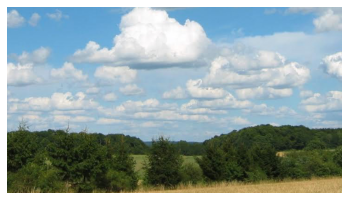

In [6]:
plt.imshow(img)
plt.axis("off")

* 이미지는 3개의 채널로 구성되어 있습니다. 파이썬은 인덱스 번호가 0번부터 시작하기 때문에 0, 1, 2 으로 각각 R,G,B 채널에 접근할 수 있습니다.

In [7]:
img[:,:,0]

array([[ 88,  87,  88, ..., 173, 172, 172],
       [ 89,  88,  89, ..., 172, 172, 172],
       [ 85,  89,  87, ..., 173, 171, 172],
       ...,
       [ 75,  85,  98, ..., 187, 204, 208],
       [ 68,  84, 100, ..., 187, 199, 203],
       [ 80, 101, 109, ..., 190, 195, 198]], dtype=uint8)

In [8]:
img[:,:,1]

array([[156, 155, 156, ..., 191, 190, 190],
       [155, 156, 156, ..., 190, 190, 190],
       [155, 157, 155, ..., 191, 189, 190],
       ...,
       [ 78,  89, 102, ..., 163, 180, 184],
       [ 75,  89, 105, ..., 163, 175, 179],
       [ 85, 106, 114, ..., 166, 171, 174]], dtype=uint8)

In [9]:
img[:,:,2]

array([[205, 204, 205, ..., 203, 202, 202],
       [205, 205, 208, ..., 202, 202, 202],
       [206, 206, 204, ..., 203, 201, 202],
       ...,
       [ 31,  39,  51, ..., 103, 120, 124],
       [ 21,  35,  51, ..., 103, 115, 119],
       [ 29,  50,  58, ..., 106, 111, 114]], dtype=uint8)

## 4.3 이미지 처리 도구
* PIL을 통해 이미지를 불러올 때는 PIL.Image.open 을 사용합니다.

In [10]:
# 이미지 파일을 매번 지정하기 번거롭지 않게 변수에 담아 재사용 합니다.
img_cloudy = image_files[1]
img_cloudy

'./images/cloudy/cloudy132.jpg'

### PIL(Pillow)

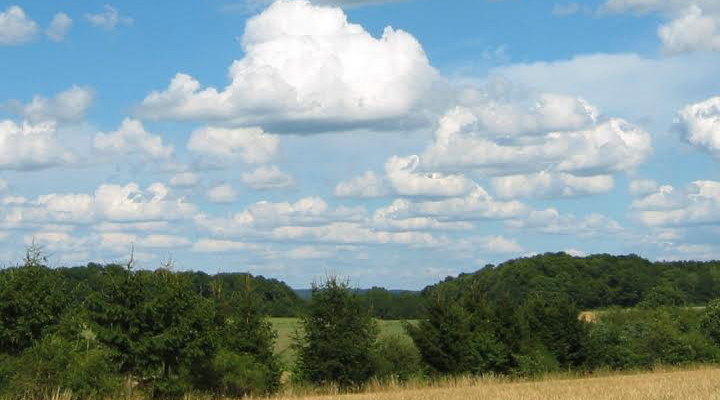

In [11]:
from PIL import Image, ImageFilter
original = Image.open(img_cloudy)
original

In [12]:
# 이미지 사이즈를 봅니다.
img_size = original.size
img_size

(720, 400)

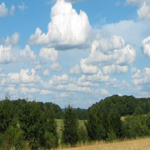

In [13]:
# 이미지 사이즈를 변경합니다.
original.resize((150, 150))

In [14]:
# 이미지를 저장합니다.
original.save("original.png")

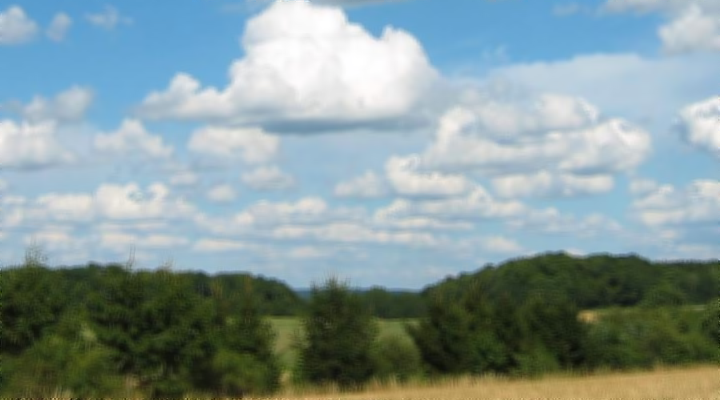

In [15]:
# BLUR 필터를 적용하여 흐리게 만듭니다.
original.filter(ImageFilter.BLUR)

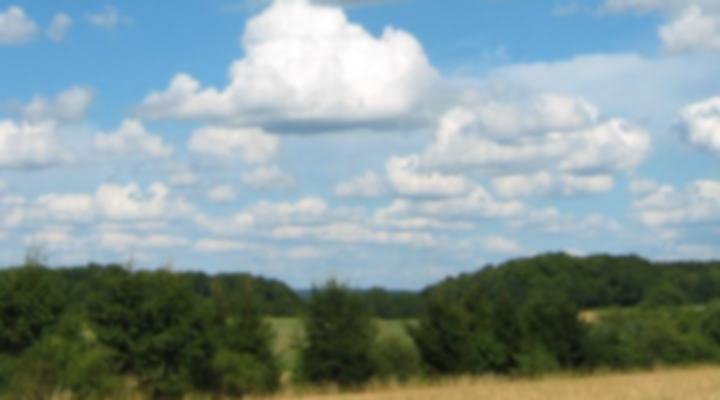

In [16]:
# GaussianBlur 필터를 적용하여 흐리게 만듭니다.
original.filter(ImageFilter.GaussianBlur)

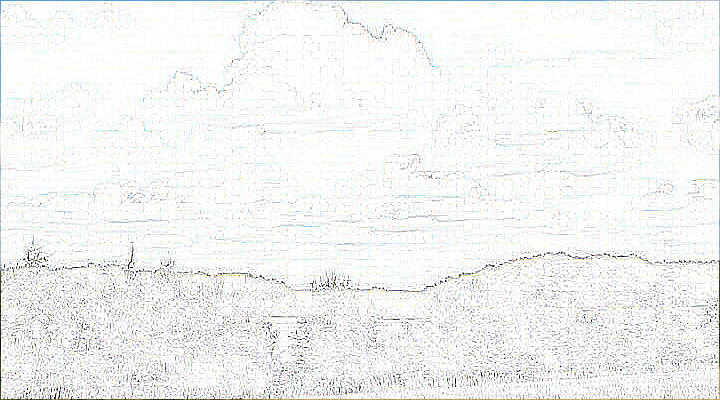

In [17]:
# CONTOUR 로 행렬의 등고선을 추출합니다.
original.filter(ImageFilter.CONTOUR)

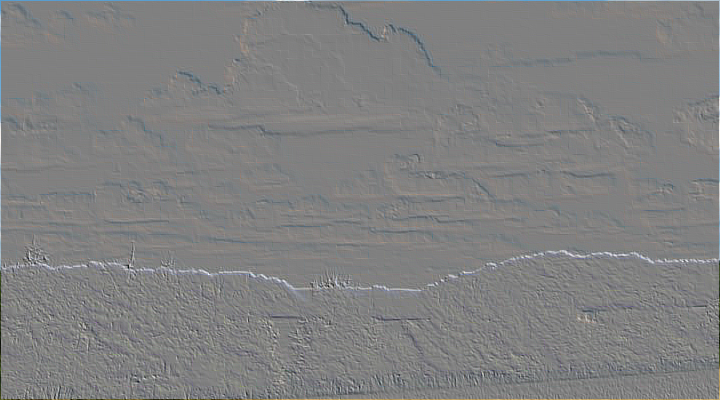

In [18]:
# EMBOSS 효과를 적용합니다.
original.filter(ImageFilter.EMBOSS)

### OpenCV
* OpenCV 를 통해 이미지를 불러옵니다. PIL 로 실습했던것과 마찬가지로 사이즈를 변경하고 필터를 적용해 봅니다.

In [19]:
img_path = image_files[0]
img_path

'./images/cloudy/cloudy126.jpg'

In [20]:
# OpenCV는 cv2로 불러옵니다. imread 를 통해 이미지를 불러옵니다. 
# OpenCV는 RGB 형태를 사용하지 않고 BGR을 사용하기 때문에 COLOR_BGR2RGB 을 통해 RGB 형태로 변환합니다. 
# 이미지 애플리케이션은 RGB를 사용합니다. Matplotlib에서 OpenCV 컬러 이미지를 올바르게 출력하려면 먼저 컬러를 RGB로 변환합니다. 
# imread를 통해 이미지를 불러오면 배열형태가 됩니다. 
# OpenCV 뷰어를 사용해서 이미지를 볼 수도 있지만 실습 노트북에서 보기 위해서는 matplotlib 의 pyplot을 사용합니다.
import cv2

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img.shape

(480, 852, 3)

In [21]:
# cv2.imread 로 불러온 이미지 배열입니다.
img

array([[[207, 220, 239],
        [207, 220, 239],
        [207, 220, 239],
        ...,
        [ 90, 132, 206],
        [ 90, 132, 206],
        [ 90, 132, 206]],

       [[206, 219, 238],
        [206, 219, 238],
        [206, 219, 238],
        ...,
        [ 91, 133, 207],
        [ 91, 133, 207],
        [ 91, 133, 207]],

       [[206, 219, 238],
        [206, 219, 238],
        [206, 219, 238],
        ...,
        [ 91, 133, 207],
        [ 91, 133, 207],
        [ 91, 133, 207]],

       ...,

       [[119, 168, 235],
        [119, 168, 235],
        [119, 168, 235],
        ...,
        [192, 207, 228],
        [192, 207, 228],
        [192, 207, 228]],

       [[119, 168, 235],
        [119, 168, 235],
        [119, 168, 235],
        ...,
        [192, 207, 230],
        [192, 207, 230],
        [192, 207, 230]],

       [[119, 168, 235],
        [119, 168, 235],
        [119, 168, 235],
        ...,
        [192, 206, 232],
        [192, 206, 232],
        [192, 206, 232]]

(-0.5, 851.5, 479.5, -0.5)

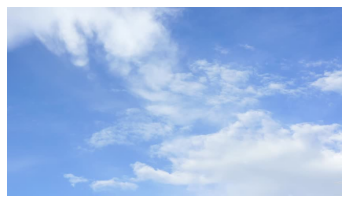

In [22]:
from matplotlib import pyplot as plt

plt.imshow(img)
plt.axis("off")

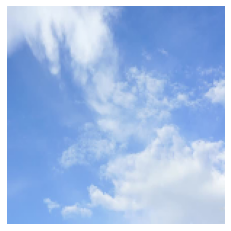

In [23]:
# 이미지 크기를 150x150 픽셀로 크기를 변경합니다.
image_150x150 = cv2.resize(img, (150, 150)) 
plt.imshow(image_150x150, cmap="gray")
plt.axis("off")
plt.show()

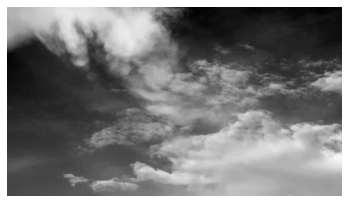

In [24]:
# IMREAD_GRAYSCALE을 통해 흑백 이미지로 변환합니다.
image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) 
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

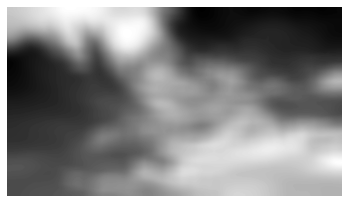

In [25]:
#각 픽셀 주변의 50X50커널 평균값으로 이미지를 흐리게 합니다.
image_blurry = cv2.blur(image, (50,50))
plt.imshow(image_blurry, cmap="gray")
plt.axis("off")
plt.show()

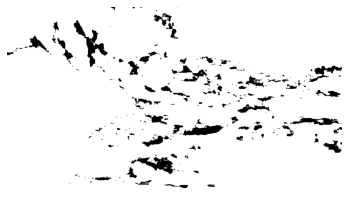

In [26]:
# 적응적 임계처리를 적용합니다. 어떤 값보다 큰 값을 가진 픽셀을 흰색으로 만들고 작은 값을 가진 픽셀은 검은색으로 만드는 과정입니다.
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image, max_output_value,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean) 
plt.imshow(image_binarized, cmap="gray")
plt.axis("off")
plt.show()